### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy import sparse

sns.set(style="ticks", color_codes=True)
%matplotlib inline

import os
import json

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from datetime import datetime
import dateutil

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

import xgboost as xgb
from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import r2_score

#### Import Dataset

In [2]:
# import dataset
df = pd.read_csv('dataset.csv')

In [3]:
df.head(5)

,numberPosts,website,urlProfile,username,numberFollowing,descriptionProfile,alias,numberFollowers,urlImgProfile,filename,date,urlImage,mentions,multipleImage,isVideo,localization,tags,numberLikes,url,description
0,988,www.sylviemeis.de,https://www.instagram.com/1misssmeis/,Sylvie Meis Official Account,233,TV Host Let's Dance for RTL Germany / SBS6 / P...,1misssmeis,720979,https://scontent.cdninstagram.com/t51.2885-19/...,18161288_472089323136061_5128727096486526976_n...,2017-04-29T05:00:00.000Z,https://scontent.cdninstagram.com/t51.2885-15/...,"['@fraukeludowig_official', '@rtl_exclusiv', '...",False,False,NaN,['#exclusivspezial'],10047,https://www.instagram.com/p/BTdS7XgBe4X/?taken...,With my lovely colleague @fraukeludowig_offici...
1,988,www.sylviemeis.de,https://www.instagram.com/1misssmeis/,Sylvie Meis Official Account,233,TV Host Let's Dance for RTL Germany / SBS6 / P...,1misssmeis,720979,https://scontent.cdninstagram.com/t51.2885-19/...,18161312_678529115665252_1780327406628765696_n...,2017-04-29T05:00:00.000Z,https://scontent.cdninstagram.com/t51.2885-15/...,"['@tine', '@rachelzoe', '@lecolook', '@letsdan...",False,False,NaN,"['#jumpsuit', '#glam', '#ootn']",16781,https://www.instagram.com/p/BTdRaquBZTD/?taken...,"My look last night, hosting Let's Dance! Style..."
2,988,www.sylviemeis.de,https://www.instagram.com/1misssmeis/,Sylvie Meis Official Account,233,TV Host Let's Dance for RTL Germany / SBS6 / P...,1misssmeis,720979,https://scontent.cdninstagram.com/t51.2885-19/...,18096206_126240614590026_6106733145975947264_n...,2017-04-27T05:00:00.000Z,https://scontent.cdninstagram.com/t51.2885-15/...,"['@letsdance', '@rtlde', '@rtlde', '@letsdance']",False,False,NaN,"['#rehearsalday', '#behindthescenes']",11227,https://www.instagram.com/p/BTZXesPhDsB/?taken...,Calm before the 'glam' storm! 💋💄💅🏻💆🏼💇🏼Tomorrow...
3,988,www.sylviemeis.de,https://www.instagram.com/1misssmeis/,Sylvie Meis Official Account,233,TV Host Let's Dance for RTL Germany / SBS6 / P...,1misssmeis,720979,https://scontent.cdninstagram.com/t51.2885-19/...,18094963_1399253156802062_6673302163394920448_...,2017-04-24T05:00:00.000Z,https://scontent.cdninstagram.com/t51.2885-15/...,"['@bydanienl', '@roland_mouret', '@casadeioffi...",False,False,NaN,"['#dress', '#shoes', '#glam']",21539,https://www.instagram.com/p/BTRS6IOhz6J/?taken...,🌼Today's look for QVC.. styled by @bydanienl #...
4,988,www.sylviemeis.de,https://www.instagram.com/1misssmeis/,Sylvie Meis Official Account,233,TV Host Let's Dance for RTL Germany / SBS6 / P...,1misssmeis,720979,https://scontent.cdninstagram.com/t51.2885-19/...,18011499_901505923322739_4323762320120479744_n...,2017-04-22T05:00:00.000Z,https://scontent.cdninstagram.com/t51.2885-15/...,"['@elisabettafranchi', '@serenagoldenbaum']",False,False,NaN,"['#weekend', '#yay', '#happyweekend', '#kiss']",21054,https://www.instagram.com/p/BTLTV46BKDF/?taken...,💋Happy Weekend Lovelies ❤ #weekend #yay #happy...


In [4]:
# description of columns and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16539 entries, 0 to 16538
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   numberPosts         16539 non-null  int64 
 1   website             14652 non-null  object
 2   urlProfile          16539 non-null  object
 3   username            16335 non-null  object
 4   numberFollowing     16539 non-null  int64 
 5   descriptionProfile  16148 non-null  object
 6   alias               16539 non-null  object
 7   numberFollowers     16539 non-null  int64 
 8   urlImgProfile       16539 non-null  object
 9   filename            16539 non-null  object
 10  date                16539 non-null  object
 11  urlImage            16539 non-null  object
 12  mentions            16539 non-null  object
 13  multipleImage       16539 non-null  bool  
 14  isVideo             16539 non-null  bool  
 15  localization        6887 non-null   object
 16  tags                16

1) Our Dataset contains 20 columns, they are as follows:
 *  numberPosts         
 *  website            
 *  urlProfile          
 *  username            
 *  numberFollowing     
 *  descriptionProfile  
 *  alias               
 *  numberFollowers     
 *  urlImgProfile       
 *  filename            
 *  date              
 *  urlImage        
 *  mentions         
 *  multipleImage      
 *  isVideo              
 *  localization       
 *  tags                
 *  numberLikes        
 *  url               
 *  description

In [5]:
# Taking the essential columns from the dataset for furthar evaluation
full=pd.read_csv('dataset.csv', sep=',', na_values='NaN')
y=full["numberLikes"]

toDrop = ['numberLikes', 'username', 'urlProfile', 'urlImgProfile', 'filename', 'url', 'urlImage', 'isVideo']
processed = full.drop(toDrop,axis=1)

nonCat = ['descriptionProfile', 'description', 'tags', 'mentions', 'localization']
processed = processed.drop(nonCat, axis=1)

#### Note: In our evaluation we will be considering few major columns that might be influencing the number of likes on the instagram posts

In [6]:
processed

,numberPosts,website,numberFollowing,alias,numberFollowers,date,multipleImage
0,988,www.sylviemeis.de,233,1misssmeis,720979,2017-04-29T05:00:00.000Z,False
1,988,www.sylviemeis.de,233,1misssmeis,720979,2017-04-29T05:00:00.000Z,False
2,988,www.sylviemeis.de,233,1misssmeis,720979,2017-04-27T05:00:00.000Z,False
3,988,www.sylviemeis.de,233,1misssmeis,720979,2017-04-24T05:00:00.000Z,False
4,988,www.sylviemeis.de,233,1misssmeis,720979,2017-04-22T05:00:00.000Z,False
...,...,...,...,...,...,...,...
16534,1982,NaN,0,zyoshka,162429,2017-04-22T05:00:00.000Z,False
16535,1982,NaN,0,zyoshka,162429,2017-04-21T05:00:00.000Z,False
16536,1982,NaN,0,zyoshka,162429,2017-04-21T05:00:00.000Z,False
16537,1982,NaN,0,zyoshka,162429,2017-04-21T05:00:00.000Z,True


In [7]:
# extracting the type of website mentioned in user's bio
processed['youtube']=processed['website'].str.contains("youtube|youtu", na=False).astype(int)
processed['music']=processed['website'].str.contains("soundcloud|spoti", na=False).astype(int)
processed['tumblr']=processed['website'].str.contains("tumblr", na=False).astype(int)
processed['facebook']=processed['website'].str.contains("facebook", na=False).astype(int)
processed['blog']=processed['website'].str.contains("blog|wordpress", na=False).astype(int)
processed['twitter']=processed['website'].str.contains("twitter", na=False).astype(int)
processed['other']=processed['website'].str.contains(".", na=False).astype(int)

processed = processed.drop(['website'], axis=1)

In [8]:
processed['multipleImage']=processed['multipleImage'].astype(int)

In [9]:
copy=processed["date"].copy()
for i in range(0, 16539):
    copy[i] = datetime.weekday((dateutil.parser.parse(processed["date"][i])))
processed["date"]=copy.astype(np.int64)

In [10]:
# Extracting the data of days on which user has posted their post on instagram
processed['mon']=(processed['date']==0).astype(int)
processed['tue']=(processed['date']==1).astype(int)
processed['wed']=(processed['date']==2).astype(int)
processed['thu']=(processed['date']==3).astype(int)
processed['fri']=(processed['date']==4).astype(int)
processed['sat']=(processed['date']==5).astype(int)
processed['sun']=(processed['date']==6).astype(int)

processed = processed.drop(['date'], axis=1)

In [11]:
# Transforming non-numerical labels to numerical labels
le = preprocessing.LabelEncoder()
le.fit(processed["alias"])
list(le.classes_)
alias_num=le.transform(processed["alias"])
#list(le.inverse_transform(alias_num))
processed["alias"]=alias_num

In [12]:
processed

,numberPosts,numberFollowing,alias,numberFollowers,multipleImage,youtube,music,tumblr,facebook,blog,twitter,other,mon,tue,wed,thu,fri,sat,sun
0,988,233,0,720979,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,988,233,0,720979,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,988,233,0,720979,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,988,233,0,720979,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,988,233,0,720979,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16534,1982,0,972,162429,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
16535,1982,0,972,162429,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16536,1982,0,972,162429,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16537,1982,0,972,162429,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:
#avg likes and numfollowers
processed["likes"]=y

avgLikes = []
numFollowers = []

for i in range(0,10):
    np.append(numFollowers, processed[processed["alias"]==i]['numberFollowers'].iloc[0])
    np.append(avgLikes, np.sum(processed[processed["alias"]==i]["likes"])/len(processed[processed["alias"]==i]))

In [14]:
# One hot encoding
encoder = OneHotEncoder()
encoder.fit(processed["alias"].values.reshape(-1, 1))
alias_sparse = encoder.transform(processed["alias"].values.reshape(-1, 1))

In [15]:
alias_sparse.shape

(16539, 973)

In [16]:
X_user=sp.sparse.hstack((processed.astype(float), alias_sparse))

In [17]:
lol = processed.sort_values(['numberFollowers'], ascending=[False])

In [18]:
processed

,numberPosts,numberFollowing,alias,numberFollowers,multipleImage,youtube,music,tumblr,facebook,blog,twitter,other,mon,tue,wed,thu,fri,sat,sun,likes
0,988,233,0,720979,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,10047
1,988,233,0,720979,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,16781
2,988,233,0,720979,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,11227
3,988,233,0,720979,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,21539
4,988,233,0,720979,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,21054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16534,1982,0,972,162429,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6463
16535,1982,0,972,162429,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6519
16536,1982,0,972,162429,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6474
16537,1982,0,972,162429,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6195


### Data Visualization

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


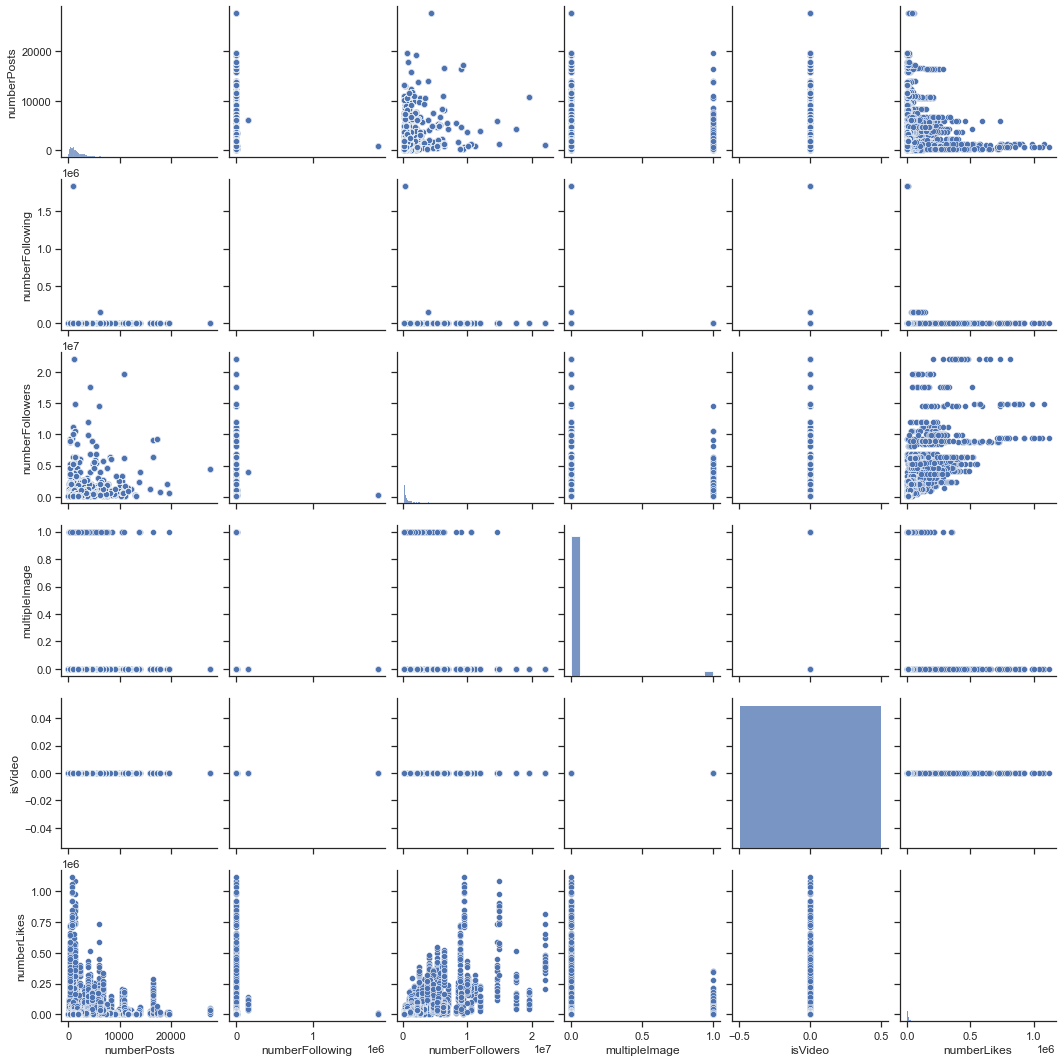

In [19]:
# pairplots of numberPosts, numberFollowing, numberFollowers, multipleImages, isVideo and numberLikes
sns.pairplot(full)

###### Observation:
* numberLikes are corelated with numberFollowers, numberPosts

In [20]:
pd.options.display.float_format = '{:.2f}'.format
full.describe()

,numberPosts,numberFollowing,numberFollowers,numberLikes
count,16539.00,16539.00,16539.00,16539.00
mean,2315.73,2590.56,997829.41,24414.26
std,2655.38,59090.66,1934400.77,64220.60
min,15.00,0.00,124965.00,0.00
25%,787.00,191.00,198039.00,3232.50
50%,1481.00,396.00,393843.00,7351.00
75%,2932.00,645.00,935310.00,18357.00
max,27671.00,1838511.00,22130730.00,1115123.00


##### Observation:
###### * We can see that the number of likes has a high standard deviation of 64220.60. 
###### * It appears that there is a high disparity as the mean is 24414.26 but 75% of the posts have less than 18357.00 likes.

In [21]:
print('Number of posts: ' + str(len(full)))
print('Number of users: ' + str(full['alias'].nunique()))

Number of posts: 16539
Number of users: 973


* There are  973 unique users in our dataset
* And 16539 posts

In [22]:
pd.isnull(full).sum()

numberPosts              0
website               1887
urlProfile               0
username               204
numberFollowing          0
descriptionProfile     391
alias                    0
numberFollowers          0
urlImgProfile            0
filename                 0
date                     0
urlImage                 0
mentions                 0
multipleImage            0
isVideo                  0
localization          9652
tags                     0
numberLikes              0
url                      0
description            220
dtype: int64

##### 'Website', 'username', 'descriptionProfile', 'localization', 'description' columns has some missing data, Hence we cannot consider them as a major columns for training our models

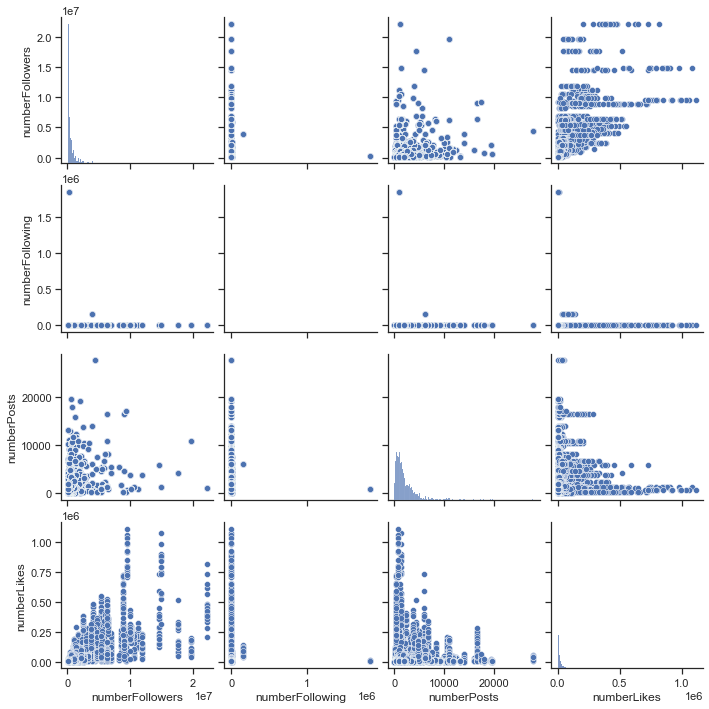

In [23]:
user=full[["numberFollowers", "numberFollowing", "numberPosts", 'numberLikes']]
sns.pairplot(user)

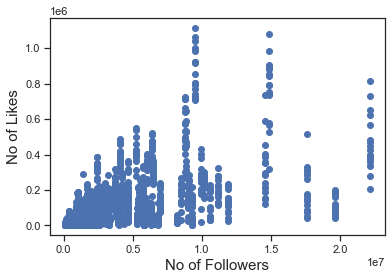

In [24]:
plt.scatter(user['numberFollowers'],user['numberLikes'])
plt.xlabel('No of Followers', fontsize=15)
plt.ylabel('No of Likes', fontsize=15)
plt.show()

#### Note: From the plot we can derive that people having a large number of followers don’t necessarily have a high number of likes. Hence, the number of followers only is probably not a good metric to predict the number of likes of a given post.

### Split Data into Train and Test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_user, y, test_size=0.2, random_state=0)

### Model Evaluation

In [26]:
# Applying XGBoost 
model_xgb = xgb.XGBRegressor(max_depth=3, learning_rate=0.48, n_estimators=361)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred)**0.5
r2score = r2_score(y_test,y_pred)
print("RMSE",RMSE)


RMSE 955.904922764511


###### * We have achieved RMSE of 955.90 with max_depth=3, learning_rate=0.48, and n_estimators=361

In [27]:
# considering only required attributes that are directly creating impact on our problem statement
user=full[["numberFollowers", "numberFollowing", "numberPosts", 'numberLikes']]
X_user_processed=sp.sparse.hstack((user.astype(float), alias_sparse))
X_train_user, X_test_user, y_train_user, y_test_user = train_test_split(X_user_processed, y, test_size=0.2, random_state=0)

In [28]:
# applying XGBoost on selected Features
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train_user, y_train_user)
y_pred_user = model_xgb.predict(X_test_user)
RMSE = mean_squared_error(y_test_user, y_pred_user)**0.5
print(RMSE)
r2score = r2_score(y_test_user,y_pred_user)
print("r2score",r2score)

824.0489494410587
r2score 0.9998278768203445


###### After using XGBoost on selected features of the dataset, Our RMSE score went down to 824.04 and our R² score became 0.99
###### Note: The RMSE value has decreased from the earlier observation, Hence these selected features 

### Plot Actual value and Predictions

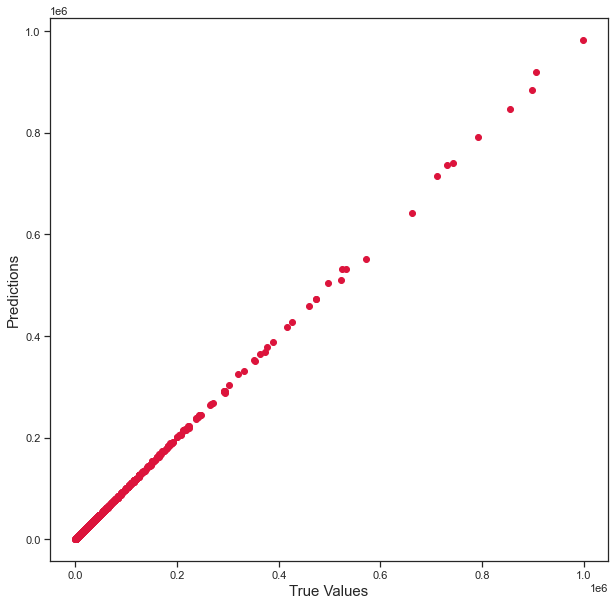

In [29]:
# ploting true values and the predicted values
plt.figure(figsize=(10,10))
plt.scatter(y_test_user, y_pred_user, c='crimson')

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [30]:
# function to return best score after optimization
def score(params):
    global best2
    global count
    count=count+1
    print(count)
    num_round = int(params['n_estimators'])
    del(params['n_estimators'])
    #params['n_estimators']=num_round
    dtrain = xgb.DMatrix(X_train_user, label=y_train_user)
    dvalid = xgb.DMatrix(X_test_user, label=y_test_user)
    model = xgb.train(params, dtrain, num_round)
    predictions = model.predict(dvalid)
    score = mean_squared_error(y_test_user, predictions)**0.5
    r2score = r2_score(y_test_user,y_pred_user)

    
    if (score<best2):
        best2=score
        print(params)
        print(num_round)
        print("\tScore {0}\n\n".format(score))
        print("\tR2 {0}\n\n".format(r2score))

    return {'loss': score, 'status': STATUS_OK}

In [31]:
# function to pass hyperparameter and eventually return best loss
def optimize():
    space = {
             'n_estimators' : hp.quniform('n_estimators', 100, 1000, 1),
             'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
             'max_depth' : hp.choice('max_depth', np.arange(3, 7, dtype=int))
             }

    best = fmin(score, space, algo=tpe.suggest, max_evals=50)

    print(best)

In [32]:
# Evaluation
best2=100000
count=0
optimize()

1                                                                                                                      
{'learning_rate': 0.41000000000000003, 'max_depth': 5}                                                                 
420                                                                                                                    
	Score 696.237233386885                                                                                                


	R2 0.9998278768203445                                                                                                 


2                                                                                                                      
{'learning_rate': 0.33, 'max_depth': 4}                                                                                
272                                                                                                                    
	Score 608.8437593320633            

49                                                                                                                     
50                                                                                                                     
100%|████████████████████████████████████████████████| 50/50 [05:08<00:00,  6.17s/trial, best loss: 483.24381892541754]
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 433.0}


##### On applying an XGBoost model on these features with the following parameters: max_depth=2, learning_rate=0.05, n_estimators=433.0
##### we obtain a best loss of 483.24 and R² of 0.99.

### Creating Dataframe to showcase the Actual and Predicted Likes

In [33]:
# create a new dataframe with column name 'Actual Likes', 'Predicted Likes'
df = pd.DataFrame(columns = ['Actual Likes', 'Predicted Likes'])

In [34]:
# storing Actual and Predicted Values
df['Actual Likes'] = y_test
df['Predicted Likes'] = y_pred

In [35]:
# converting predicted values into a whole numbers 
df['Predicted Likes'] = df['Predicted Likes'].apply(lambda x: int(x))

In [36]:
df.head(10)

,Actual Likes,Predicted Likes
15061,4828,4793
14969,9379,9322
9917,8784,8752
2351,12983,13081
12847,14458,14466
15986,5109,5110
15054,11685,11691
6631,11322,11390
6700,4183,4168
9723,6326,6335
